This is a script for analysing the forecast performance (test RMSE) for post-processing models applying lead-time-continuous and lead-time-separated approach. Please refer to Section 3.2.2 of the report for more information of the two approaches. This script produces Figure 4.3 in the report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# Change paths for own use
ROOT = "ROOT/"
data_path = ROOT+"raw_data_EUPPBench/"
result_path_continuous = ROOT+"trained_models/lead_time_continuous/"
result_path_separated = ROOT+"trained_models/lead_time_separated/"

In [3]:
# Results df of lead-time-continuous approach
df_tgt = pd.read_csv(result_path_continuous + 'results_giant_20_300.csv')

In [4]:
# Create results df of lead-time-separated approach
df_test_result = pd.read_csv(result_path_separated + 'results_lead6_20_300.csv')
for lead in np.arange(12,121,6):
    df = pd.read_csv(result_path_separated + 'results_lead'+str(lead)+"_20_300.csv")
    df_test_result = pd.concat([df_test_result, df])

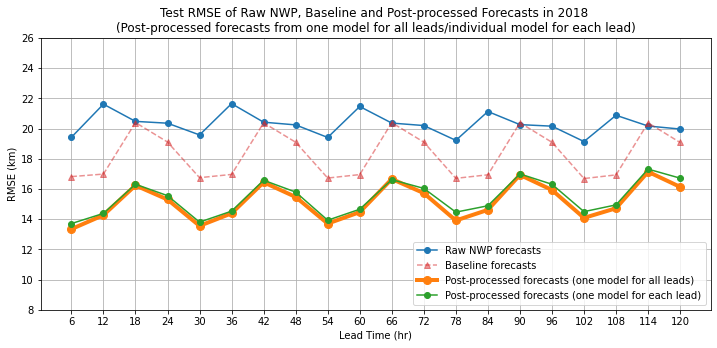

In [10]:
# Plot by lead time
import xarray as xr
vis_forecast_obs = xr.open_dataarray(data_path + "vis_forecast_observations.nc")
lead = np.array(vis_forecast_obs['forecast_period'][1:])
lead_hr = np.array(lead*10**-9/3600, dtype='int')

rmse_rf = []
rmse_rf_each = []
rmse_forecast = []
rmse_baseline = []

for l in lead_hr:
    df_result_lead = df_test_result[df_test_result['lead_hr']==l]
    df_tgt_lead = df_tgt[df_tgt['lead_hr']==l]
    rmse_rf.append(np.sqrt(np.mean(df_tgt_lead['error_rf']**2)))
    rmse_rf_each.append(np.sqrt(np.mean(df_result_lead['error_rf']**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_nwp']**2)))
    rmse_baseline.append(np.sqrt(np.mean(df_tgt_lead['error_baseline']**2)))

rmse_rf = np.array(rmse_rf)/1000
rmse_rf_each = np.array(rmse_rf_each)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_baseline = np.array(rmse_baseline)/1000

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lead_hr, rmse_forecast, 'o-', label='Raw NWP forecasts')
ax1.plot(lead_hr, rmse_baseline, '^--', label='Baseline forecasts', c='tab:red', alpha=0.5)
ax1.plot(lead_hr, rmse_rf, 'o-', label='Post-processed forecasts (one model for all leads)', c='tab:orange', lw=4, markersize=8)
ax1.plot(lead_hr, rmse_rf_each, 'o-', label='Post-processed forecasts (one model for each lead)', c='tab:green')
ax1.set_ylim(8,26)
plt.grid()
ax1.set_xticks(lead_hr)
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Raw NWP, Baseline and Post-processed Forecasts in 2018 \n(Post-processed forecasts from one model for all leads/individual model for each lead)")
ax1.legend(loc='lower right')